**Importing the Dependencies**

In [39]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [16]:
# loading the data from the given file
df = pd.read_excel("bp.xlsx")
df

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95
5,6,121,48,99.5,2.25,9.3,71,10
6,7,121,49,99.8,2.25,2.5,69,42
7,8,110,47,90.9,1.90,6.2,66,8
8,9,110,49,89.2,1.83,7.1,69,62
9,10,114,48,92.7,2.07,5.6,64,35


In [17]:
#feature selection
df.drop("Pt", axis=1, inplace=True)
df

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


In [18]:
X = df[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']].copy(deep = True)   # independent variables
# correlation analysis
X.corr()
# output

,Age,Weight,BSA,Dur,Pulse,Stress
Age,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


In [19]:
#feature selection
df.drop(["BSA", "Pulse"], axis=1, inplace=True)
df

,BP,Age,Weight,Dur,Stress
0,105,47,85.4,5.1,33
1,115,49,94.2,3.8,14
2,116,49,95.3,8.2,10
3,117,50,94.7,5.8,99
4,112,51,89.4,7.0,95
5,121,48,99.5,9.3,10
6,121,49,99.8,2.5,42
7,110,47,90.9,6.2,8
8,110,49,89.2,7.1,62
9,114,48,92.7,5.6,35


In [20]:
X = df[['Age', 'Weight', 'Dur', 'Stress']].copy()   # independent variables
y = df['BP'].copy()   # dependent variables
X.corr()

,Age,Weight,Dur,Stress
Age,1.000000,0.407349,0.343792,0.368224
Weight,0.407349,1.000000,0.200650,0.034355
Dur,0.343792,0.200650,1.000000,0.311640
Stress,0.368224,0.034355,0.311640,1.000000


In [21]:
# get Variance Inflation Factor (VIF) 
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

,variables,VIF
0,Weight,404.907201
1,Dur,12.206060
2,Stress,3.885621


In [37]:
#splitting data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(20, 4) (16, 4) (4, 4)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


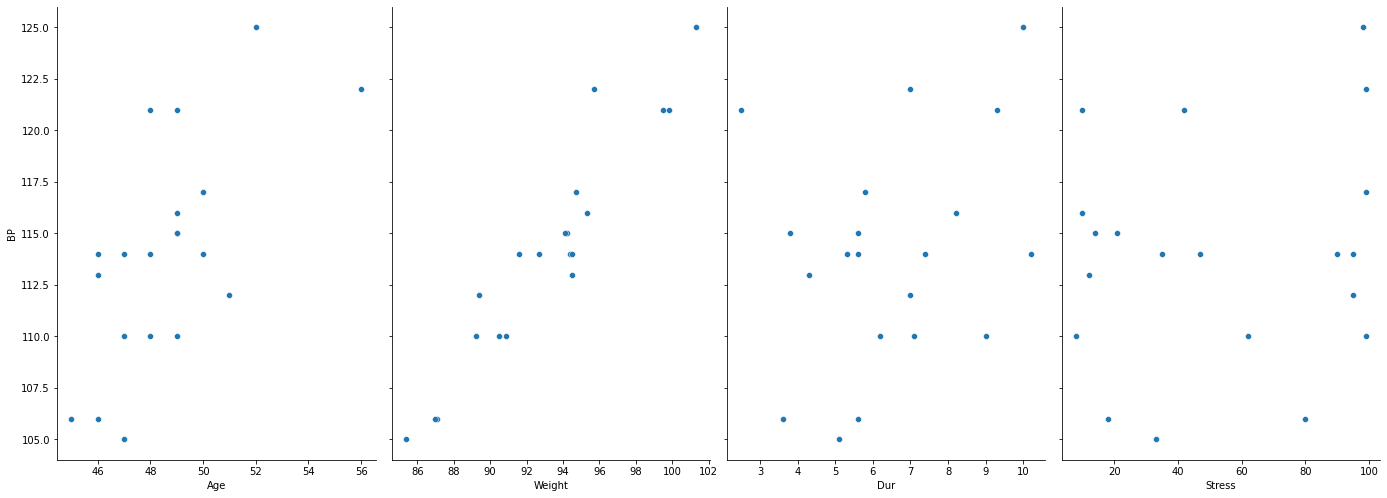

In [43]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=X_train.columns, y_vars='BP', size=7, aspect=0.7)

**Linear Regression Model**

In [23]:
linear_regression = LinearRegression()
linear_regression.fit(X,y)
prediction = linear_regression.predict(X)

In [41]:
# print the coefficients
print(linear_regression.intercept_)
print(linear_regression.coef_)

-15.869828678212087
[0.68374096 1.03412831 0.03988884 0.00218422]


In [36]:
#columns used in training the model
X_train.columns

Index(['Age', 'Weight', 'Dur', 'Stress'], dtype='object')

**Building a prediction system**

In [29]:
input_data = (50, 86.4, 5, 35)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = linear_regression.predict(input_data_reshaped)
print(prediction)

[107.94179741]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


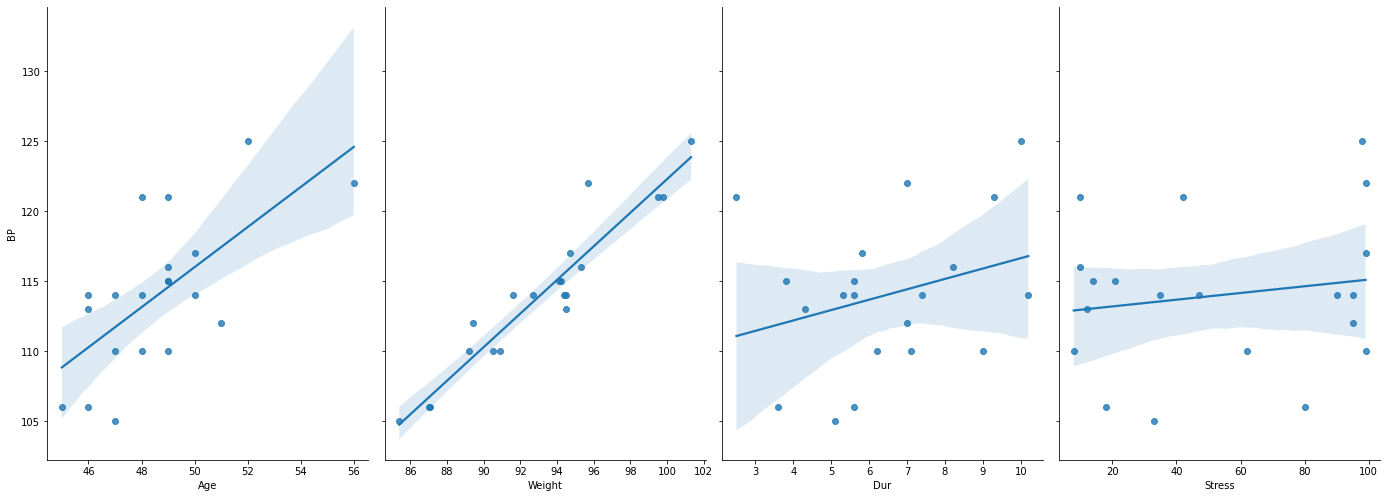

In [40]:
sns.pairplot(df, x_vars=X_train.columns, y_vars='BP', size=7, aspect=0.7, kind='reg')